In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as teg

In [2]:
# i/o params
loc = "/scratch/hcm7920/ambData/channelMean/"
loc2= "/scratch/hcm7920/ambData/grid/"
conc = [0,100]

# grid params
nx = 500
ny = 500
nz = 50

# phys params
g = 9.81
rhoConst = 1029

In [18]:
# load
rhoSteady = np.load(loc+"channelMeanRho.npy")
n2Steady  = np.load(loc+"channelMeanN2.npy")
saltSteady= np.load(loc+"channelMeanSalt.npy")
uSteady   = np.load(loc+"channelMeanU.npy")
vSteady   = np.load(loc+"channelMeanV.npy")
wSteady   = np.load(loc+"channelMeanW.npy")

VSbar     = np.load(loc+"channelMeanVSbar.npy")
WSbar     = np.load(loc+"channelMeanWSbar.npy")

VRbar     = np.load(loc+"channelMeanVRbar.npy")
WRbar     = np.load(loc+"channelMeanWRbar.npy")

# rhoTarget = 
# n2Target  = 
# uTarget   = 
# vTarget   = 
# wTarget   = 

levs = np.load(loc2+"gridLevs.npy")
levFaces = np.load(loc2+"gridLevFaces.npy")

In [4]:
# plot params
deepIndex = 30
yRange = np.linspace(-ny,ny,ny)
yRMeters = yRange*1000

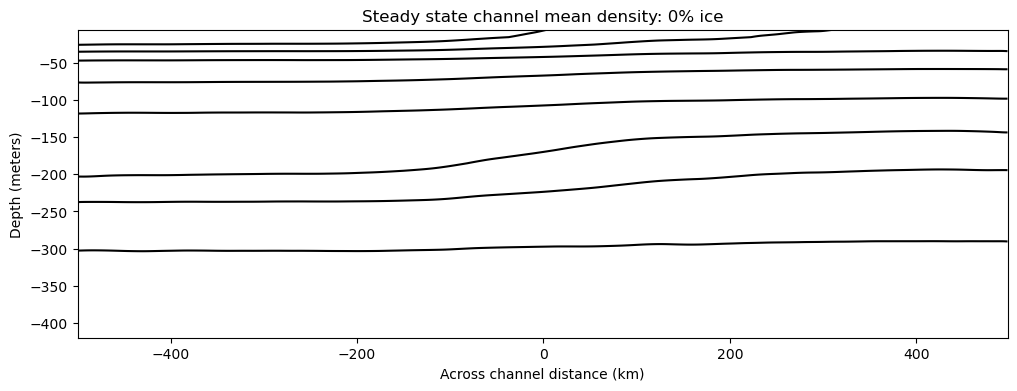

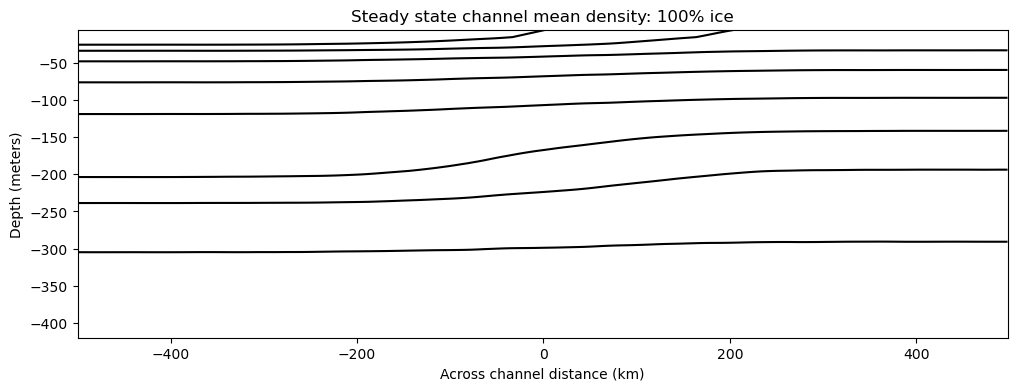

In [5]:
for i in range(len(conc)):
    contourLevs = np.linspace(rhoSteady[:,:-1,:].min(),
                              rhoSteady[:,:-1,:].max(),10)
    plt.figure(figsize=(12,4))
    data = rhoSteady[:deepIndex,:-1,i]
    plt.contour(yRange[:-1], levs[:deepIndex], data, contourLevs,
                colors="black")
    plt.title(f"Steady state channel mean density: {conc[i]}% ice")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

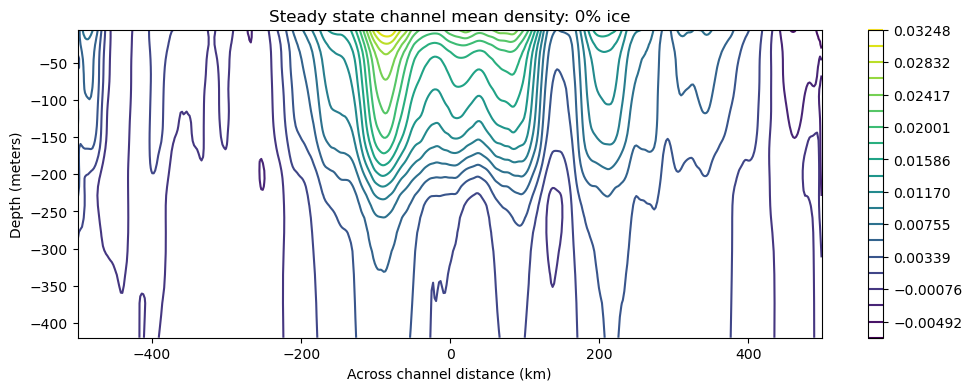

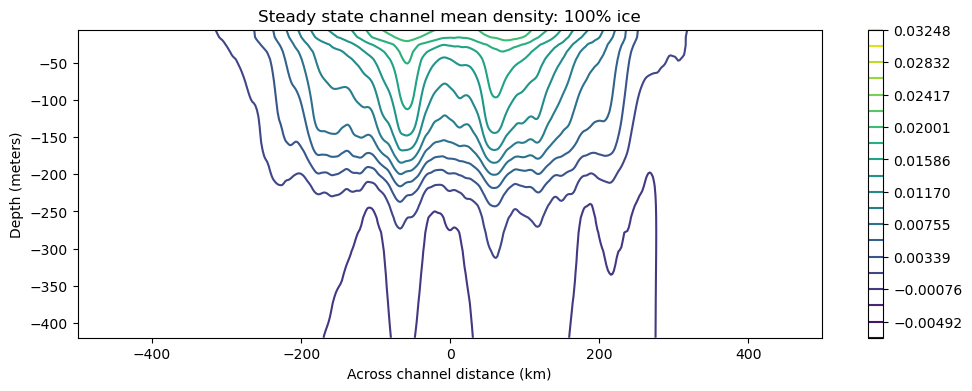

In [6]:
for i in range(len(conc)):
    contourLevs = np.linspace(uSteady[:,:-1,:].min(),
                              uSteady[:,:-1,:].max(),20)
    plt.figure(figsize=(12,4))
    data = uSteady[:deepIndex,:-1,i]
    plt.contour(yRange[:-1], levs[:deepIndex], data, contourLevs)
    plt.colorbar()
    plt.title(f"Steady state channel mean density: {conc[i]}% ice")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

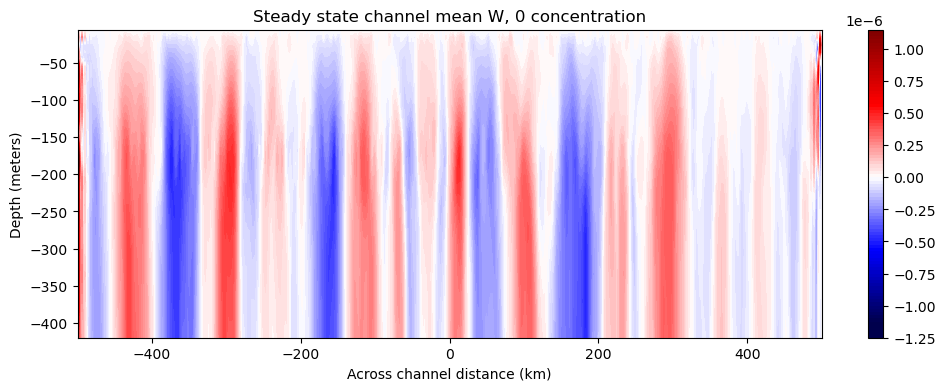

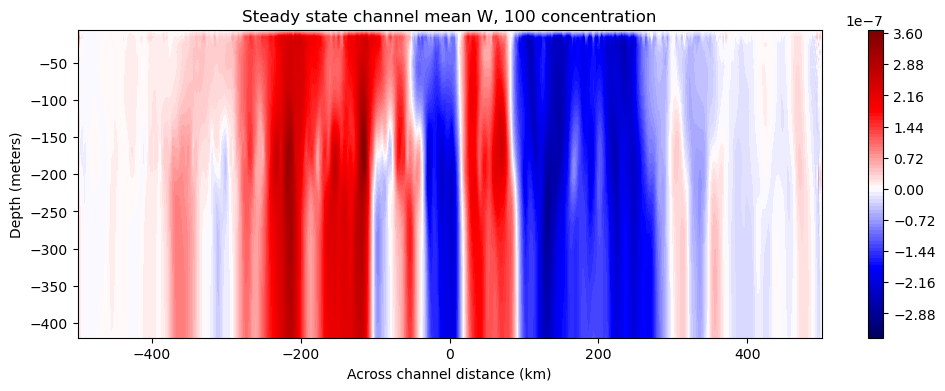

In [7]:
deepIndex = 30
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data=wSteady[:deepIndex,:,i]
    myMax=np.abs(np.max(data))
    plt.contourf(yRange,levs[:deepIndex],data,
                100,cmap='seismic',vmax=myMax,vmin=-myMax)
    plt.colorbar()
    plt.title(f"Steady state channel mean W, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

In [8]:
streamF1 = teg.cumulative_trapezoid(wSteady[:,:,:], x=yRMeters[:], axis=1, initial=0)
meanF1 = streamF1.mean(axis=(0,1))
maxLev1 = (streamF1-meanF1).max(axis=(0,1,2))
contourLevels1 = np.linspace(-maxLev1,maxLev1,20)

streamF2 = teg.cumulative_trapezoid(-vSteady[::-1,:,:], x=levs[::-1], axis=0, initial=0)
meanF2 = streamF2.mean(axis=(0,1))
maxLev2 = (streamF2-meanF2).max(axis=(0,1,2))
contourLevels2 = np.linspace(-maxLev2,maxLev2,20)

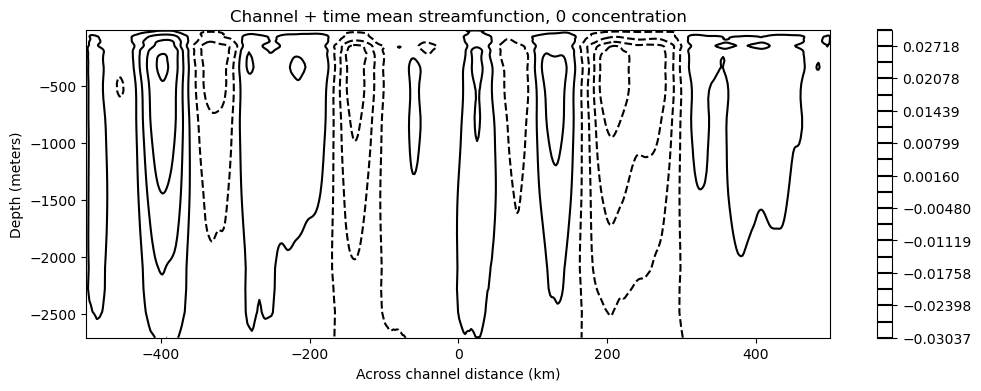

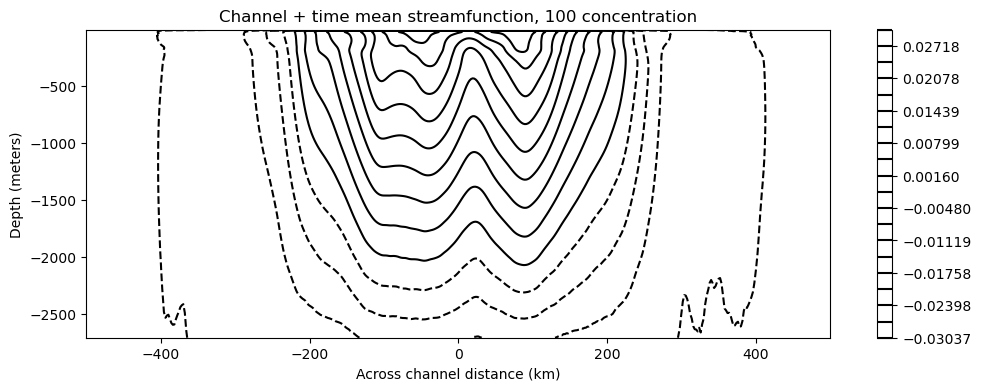

In [9]:
deepIndex = 50

for i in range(len(conc)):
#     plt.figure(figsize=(12,4))
#     myMax=np.abs(np.max(data))
# #     plt.contour(xRange,levs[:deepIndex],streamF1[:,:deepIndex,i].T,26,colors="black")
#     plt.contour(xRange,levs[:deepIndex],streamF2[:deepIndex,:,i],26
#                ,colors="black")
#     plt.colorbar()
#     plt.title(f"Channel time mean streamfunction, u from bottom, {conc[i]} concentration")
#     plt.xlabel("Across channel distance (km)")
#     plt.ylabel("Depth (meters)")
    
    plt.figure(figsize=(12,4))
    myMax=np.max(np.abs(data))
    plt.contour(yRange,levs[:deepIndex],streamF1[:deepIndex,:,i]-meanF1[i],
                contourLevels1,colors="black")
#     plt.contour(xRange,levs[:deepIndex],streamF2[:,:deepIndex,i].T,26,colors="blue")
    plt.colorbar()
    plt.title(f"Channel + time mean streamfunction, {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")
    plt.savefig(f"/home/hcm7920/experiments/arcticMiddepthBI/plots/psiSectionChannelTimeMean{conc[i]}.png"
               ,bbox_inches="tight",pad_inches=0)

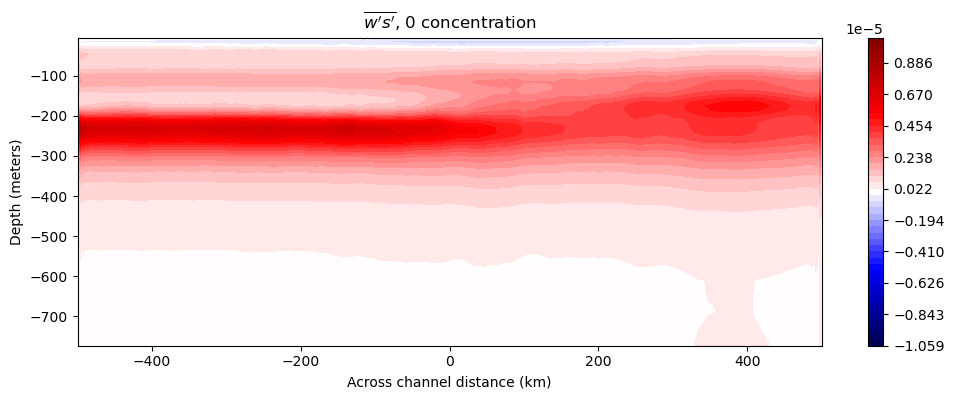

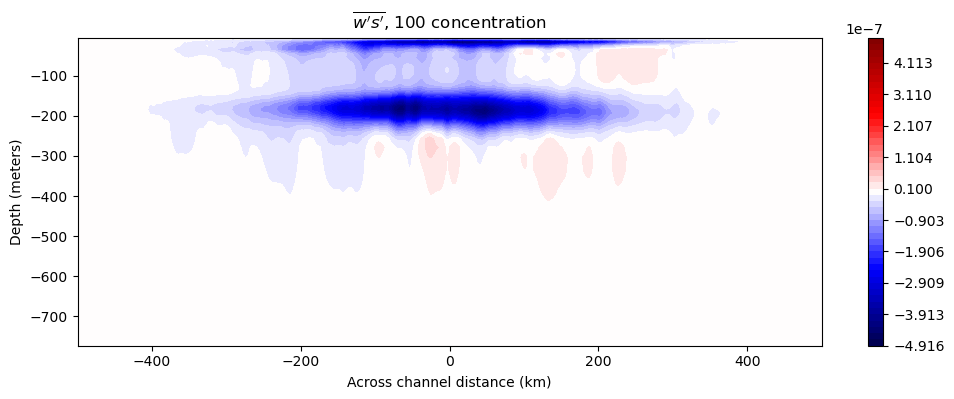

In [14]:
deepIndex = 35
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data = (WSbar[:deepIndex,:,i] 
            - (wSteady[:deepIndex,:,i]*saltSteady[:deepIndex,:,i]))
    myBound = abs(data).max()
    contours = np.linspace(-myBound,myBound,50)
    plt.contourf(yRange, levs[:deepIndex], data,
                 contours, cmap='seismic')
    plt.colorbar()
    plt.title("$\overline{w's'}$"+f", {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

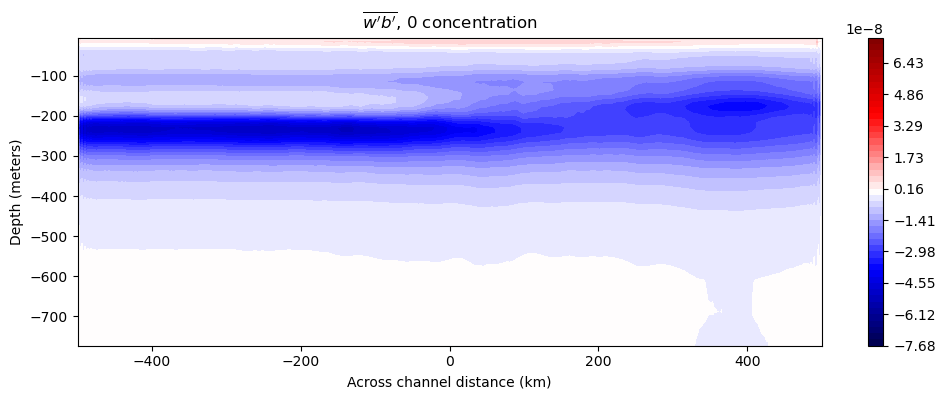

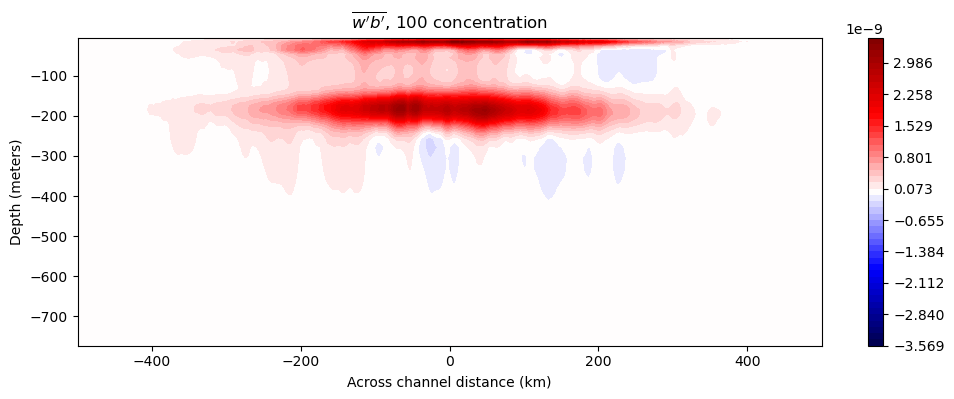

In [19]:
deepIndex = 35
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data = (WRbar[:deepIndex,:,i] 
            - (wSteady[:deepIndex,:,i]*rhoSteady[:deepIndex,:,i]))
    data *= -g / rhoConst
    myBound = abs(data).max()
    contours = np.linspace(-myBound,myBound,50)
    plt.contourf(yRange, levs[:deepIndex], data,
                 contours, cmap='seismic')
    plt.colorbar()
    plt.title("$\overline{w'b'}$"+f", {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

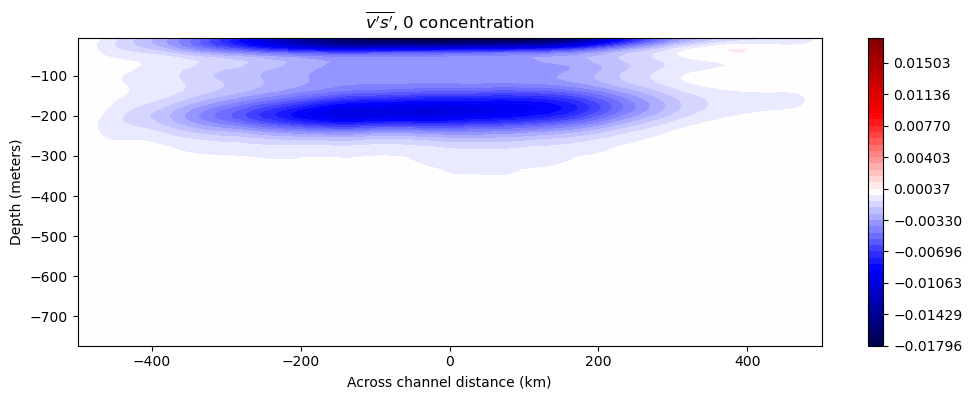

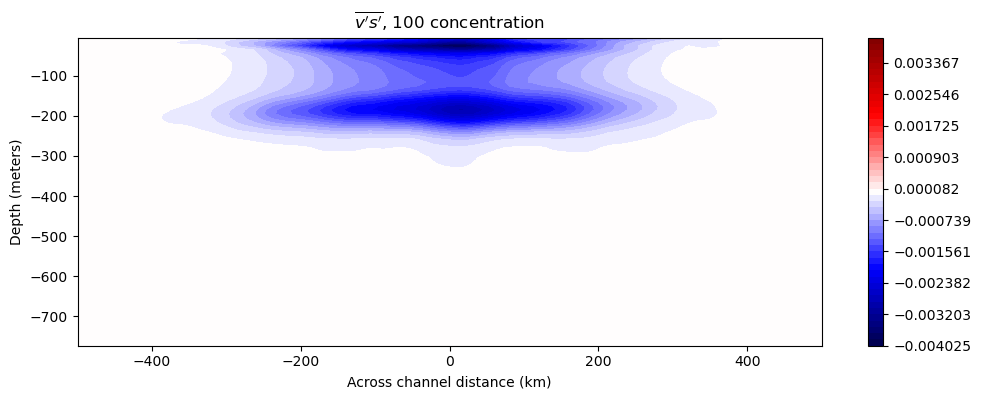

In [16]:
deepIndex = 35
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data = (VSbar[:deepIndex,:,i] 
            - (vSteady[:deepIndex,:,i]*saltSteady[:deepIndex,:,i]))
    myBound = abs(data).max()
    contours = np.linspace(-myBound,myBound,50)
    plt.contourf(yRange, levs[:deepIndex], data,
                 contours, cmap='seismic')
    plt.colorbar()
    plt.title("$\overline{v's'}$"+f", {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")

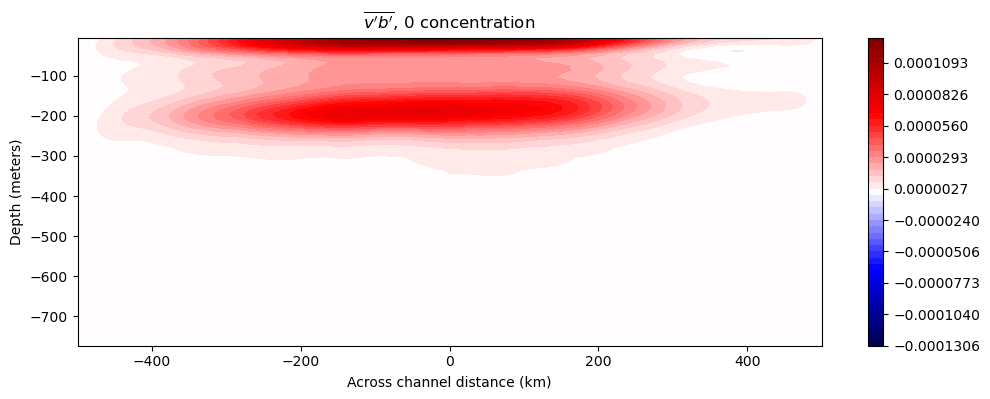

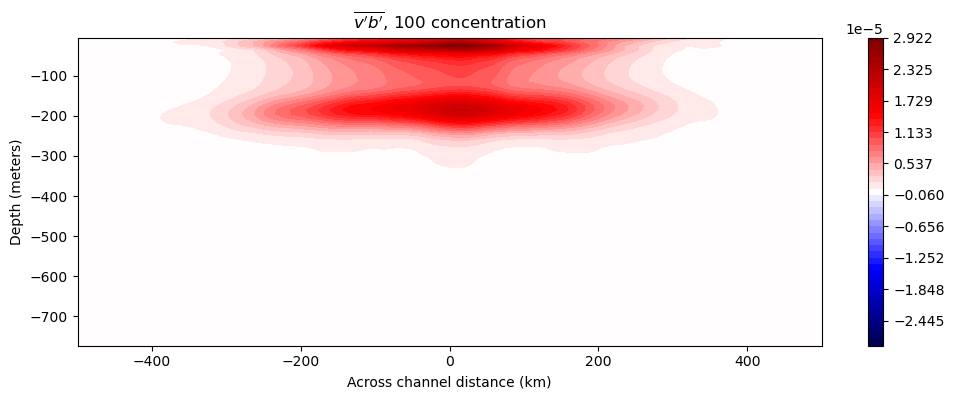

In [20]:
deepIndex = 35
for i in range(len(conc)):
    plt.figure(figsize=(12,4))
    data = (VRbar[:deepIndex,:,i] 
            - (vSteady[:deepIndex,:,i]*rhoSteady[:deepIndex,:,i]))
    data *= -g / rhoConst
    myBound = abs(data).max()
    contours = np.linspace(-myBound,myBound,50)
    plt.contourf(yRange, levs[:deepIndex], data,
                 contours, cmap='seismic')
    plt.colorbar()
    plt.title("$\overline{v'b'}$"+f", {conc[i]} concentration")
    plt.xlabel("Across channel distance (km)")
    plt.ylabel("Depth (meters)")